In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import os
%cd drive/My\ Drive
!ls

/content/drive/My Drive
'Colab Notebooks'
'Getting started.pdf'
 glove.6B.100d.txt
 glove.6B.200d.txt
 glove.6B.300d.txt
 glove.6B.50d.txt
 glove.6B.zip
 input_data.xlsx
 Mahima-07-05-2020.wav
'Mahima Sehgal Automation Deliverable - QA Test Writing.gsheet'
 Sarcasm_Headlines_Dataset.json
 testrail-import-trial_proj-2020-05-22.cfg


In [3]:
import pandas as pd
df = pd.read_excel (r'input_data.xlsx')
print (df)

                                      Short description  ... Assignment group
0                                           login issue  ...            GRP_0
1                                               outlook  ...            GRP_0
2                                    cant log in to vpn  ...            GRP_0
3                         unable to access hr_tool page  ...            GRP_0
4                                          skype error   ...            GRP_0
...                                                 ...  ...              ...
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[8500 rows x 4 columns]


In [0]:
df.shape

(8500, 4)

In [0]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_35       1
GRP_73       1
GRP_64       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [0]:
df[df.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [0]:
df[df['Short description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0


In [0]:
df[df['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [0]:
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [0]:
import numpy as np
# Replace all Nan entries with empty string
df = df.replace(np.nan, '', regex=True)

In [6]:
df.describe().transpose()

,count,unique,top,freq
Short description,8500,7482,password reset,38
Description,8500,7818,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [7]:
df[df.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group


In [0]:
df.loc[20:30]

,Short description,Description,Caller,Assignment group
20,unable to check payslips,unable to check payslips,mrzgjdal whnldmef,GRP_0
21,vpn issue,\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail...,ugephfta hrbqkvij,GRP_0
22,unable to connect to vpn,unable to connect to vpn,pfmcnahv ofzlusri,GRP_0
23,user called for vendor phone number,user called for vendor phone number,fumkcsji sarmtlhy,GRP_0
24,vpn not working,\n\nreceived from: dceoufyz.saufqkmd@gmail.com...,dceoufyz saufqkmd,GRP_0
25,erp SID_37 password reset,erp SID_37 password reset,jqhtkfsm xoehtbnl,GRP_0
26,unable to login to hr_tool to check payslips,unable to login to hr_tool to check payslips,dtisfuyp fpvrjlkz,GRP_0
27,account locked out,account locked out,lduqxywt wcydjgvl,GRP_0
28,unable to login to hr_tool,unable to login to hr_tool,mwebfhdz csndrxgi,GRP_0
29,unable to log in to erp SID_34,unable to log in to erp SID_34,hvskpglx bpsfxmon,GRP_0


In [0]:
df.loc[99]['Description']

'\n\nreceived from: ecprjbod.litmjwsy@gmail.com\n\nmy system says my password expires tomorrow.  but when i want to change to a new password, it does not allow.  the new password is not acceptingâ€¦.it says server does not authorize.  kindly check and do the needful as the password is expiring tomorrow.  '

In [0]:
df.loc[180]['Description']

"from: xdvwitpm zscxqdhoalaramdntyan \nsent: friday, october 28, 2016 9:40 am\nto: 'help@company.com'\ncc: xyculgav cuqptoah\nsubject: fw: crm license for dfgry\n\nhello,\n\ncrm is not installed in my laptop.\n\nplease support me on this.\n\n"

In [0]:
df.loc[780]['Description']

'\r\n\r\nreceived from: hkruyqfc.aouezihl@gmail.com\r\n\r\nhello\r\n\r\nrequesting you to provide me an authorization for the below mentioned programdnty.\r\n\r\n[cid:image001.jpg@01d22b8f.406fc470]\r\n\r\n\r\nbest '

In [0]:
df.loc[80]['Description']

'received from: monitoring_tool@company.com\r\n\r\njob Job_1424 failed in job_scheduler at: 10/30/2016 10:35:00'

In [0]:
desc_split = df['Description'].str.split('\r\n',9)
desc_split.head()

0    [-verified user details.(employee# & manager n...
1    [, , received from: hmjdrvpb.komuaywn@gmail.co...
2    [, , received from: eylqgodm.ybqkwiam@gmail.co...
3                      [unable to access hr_tool page]
4                                       [skype error ]
Name: Description, dtype: object

In [0]:
desc_split.loc[100]

['\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user.  please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n']

In [0]:
#df_small = df.loc[20:50]
df_small = df

In [0]:
# Data Normalization
import re
def  clean_text(df, text_field, new_text_field_name):
    #convert to lower case
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df

In [10]:
df_small_clean = clean_text(df_small, 'Description', 'Description Clean')
df_small_clean.head()


,Short description,Description,Caller,Assignment group,Description Clean
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,verified user details employee manager na...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,received from hmjdrvpb komuaywn com h...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,received from eylqgodm ybqkwiam com h...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


In [0]:
df_small_clean[['Description','Description Clean']]

,Description,Description Clean
0,-verified user details.(employee# & manager na...,verified user details employee manager na...
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,received from hmjdrvpb komuaywn com h...
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,received from eylqgodm ybqkwiam com h...
3,unable to access hr_tool page,unable to access hr tool page
4,skype error,skype error
...,...,...
8495,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,received from avglmrts vhqmtiua com g...
8496,telephony_software issue,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,vip windows password reset for tifpdchb pedxruyf
8498,i am unable to access the machine utilities to...,i am unable to access the machine utilities to...


In [0]:
df_small_clean.loc[43]['Description Clean']

'  received from  yisohglr uvteflgb  com  hi    the printer printer is not working and needs a part replaced   can you reroute the jobs in queue to printer printer    wihuyjdo qpogfwkb has indicated that prqos needs a new part and it may not deliver for a few days so the inwarehouse tools will need to print on printer for now   this needs to be taken care of today since the inwarehouse tools are printed and are picked up by an outside vendor at   pm in usa on a daily basis    please contact dkmcfreg anwmfvlgenkataramdntyana if you have questions about the jobs in queue for today   '

In [11]:
# Data Cleaning -- Removing Stop words
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_small_clean['Description Clean No Stop Words'] = df_small_clean['Description Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_small_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Short description,Description,Caller,Assignment group,Description Clean,Description Clean No Stop Words
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,verified user details employee manager na...,verified user details employee manager name ch...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,received from hmjdrvpb komuaywn com h...,received hmjdrvpb komuaywn com hello team meet...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,received from eylqgodm ybqkwiam com h...,received eylqgodm ybqkwiam com hi cannot log v...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


In [0]:
df_small_clean[['Description','Description Clean','Description Clean No Stop Words']]

,Description,Description Clean,Description Clean No Stop Words
20,unable to check payslips,unable to check payslips,unable check payslips
21,\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail...,received from ugephfta hrbqkvij com h...,received ugephfta hrbqkvij com hello helpdesk ...
22,unable to connect to vpn,unable to connect to vpn,unable connect vpn
23,user called for vendor phone number,user called for vendor phone number,user called vendor phone number
24,\n\nreceived from: dceoufyz.saufqkmd@gmail.com...,received from dceoufyz saufqkmd com hello...,received dceoufyz saufqkmd com hello able conn...
25,erp SID_37 password reset,erp sid password reset,erp sid password reset
26,unable to login to hr_tool to check payslips,unable to login to hr tool to check payslips,unable login hr tool check payslips
27,account locked out,account locked out,account locked
28,unable to login to hr_tool,unable to login to hr tool,unable login hr tool
29,unable to log in to erp SID_34,unable to log in to erp sid,unable log erp sid


In [12]:
# Getting Word Tokens
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
df_small_clean['Description Clean NSW tokens'] = df_small_clean['Description Clean No Stop Words'].apply(lambda x: word_tokenize(x))
df_small_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Short description,Description,Caller,Assignment group,Description Clean,Description Clean No Stop Words,Description Clean NSW tokens
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,verified user details employee manager na...,verified user details employee manager name ch...,"[verified, user, details, employee, manager, n..."
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,received from hmjdrvpb komuaywn com h...,received hmjdrvpb komuaywn com hello team meet...,"[received, hmjdrvpb, komuaywn, com, hello, tea..."
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,received from eylqgodm ybqkwiam com h...,received eylqgodm ybqkwiam com hi cannot log v...,"[received, eylqgodm, ybqkwiam, com, hi, can, n..."
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page,"[unable, access, hr, tool, page]"
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,"[skype, error]"


In [0]:
df_small_clean[['Description','Description Clean','Description Clean No Stop Words','Description Clean NSW tokens']]

,Description,Description Clean,Description Clean No Stop Words,Description Clean NSW tokens
20,unable to check payslips,unable to check payslips,unable check payslips,"[unable, check, payslips]"
21,\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail...,received from ugephfta hrbqkvij com h...,received ugephfta hrbqkvij com hello helpdesk ...,"[received, ugephfta, hrbqkvij, com, hello, hel..."
22,unable to connect to vpn,unable to connect to vpn,unable connect vpn,"[unable, connect, vpn]"
23,user called for vendor phone number,user called for vendor phone number,user called vendor phone number,"[user, called, vendor, phone, number]"
24,\n\nreceived from: dceoufyz.saufqkmd@gmail.com...,received from dceoufyz saufqkmd com hello...,received dceoufyz saufqkmd com hello able conn...,"[received, dceoufyz, saufqkmd, com, hello, abl..."
25,erp SID_37 password reset,erp sid password reset,erp sid password reset,"[erp, sid, password, reset]"
26,unable to login to hr_tool to check payslips,unable to login to hr tool to check payslips,unable login hr tool check payslips,"[unable, login, hr, tool, check, payslips]"
27,account locked out,account locked out,account locked,"[account, locked]"
28,unable to login to hr_tool,unable to login to hr tool,unable login hr tool,"[unable, login, hr, tool]"
29,unable to log in to erp SID_34,unable to log in to erp sid,unable log erp sid,"[unable, log, erp, sid]"


In [0]:
#Stemming Fine word stems 
from nltk.stem import PorterStemmer
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
df_small_clean['Description Stem'] = df_small_clean['Description Clean NSW tokens'].apply(lambda x: word_stemmer(x))


In [14]:
#Lemmatization Find word Lemmas
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df_small_clean['Description lemma'] = df_small_clean['Description Stem'].apply(lambda x: word_lemmatizer(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [15]:
#POS Tagging
def word_pos_tagger(text):
    pos_tagged_text = nltk.pos_tag(text)
    return pos_tagged_text
nltk.download('averaged_perceptron_tagger')
df_small_clean['Description POS'] = df_small_clean['Description Clean NSW tokens'].apply(lambda x: word_pos_tagger(x))
df_small_clean.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Short description,Description,Caller,Assignment group,Description Clean,Description Clean No Stop Words,Description Clean NSW tokens,Description Stem,Description lemma,Description POS
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,verified user details employee manager na...,verified user details employee manager name ch...,"[verified, user, details, employee, manager, n...","[verifi, user, detail, employe, manag, name, c...","[verifi, user, detail, employe, manag, name, c...","[(verified, VBN), (user, NN), (details, NNS), ..."
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,received from hmjdrvpb komuaywn com h...,received hmjdrvpb komuaywn com hello team meet...,"[received, hmjdrvpb, komuaywn, com, hello, tea...","[receiv, hmjdrvpb, komuaywn, com, hello, team,...","[receiv, hmjdrvpb, komuaywn, com, hello, team,...","[(received, VBN), (hmjdrvpb, JJ), (komuaywn, N..."
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,received from eylqgodm ybqkwiam com h...,received eylqgodm ybqkwiam com hi cannot log v...,"[received, eylqgodm, ybqkwiam, com, hi, can, n...","[receiv, eylqgodm, ybqkwiam, com, hi, can, not...","[receiv, eylqgodm, ybqkwiam, com, hi, can, not...","[(received, VBN), (eylqgodm, JJ), (ybqkwiam, N..."
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page,"[unable, access, hr, tool, page]","[unabl, access, hr, tool, page]","[unabl, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, ..."
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,"[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]"


In [0]:
# Groupby by Group ID
group_df = df.groupby("Assignment group")

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

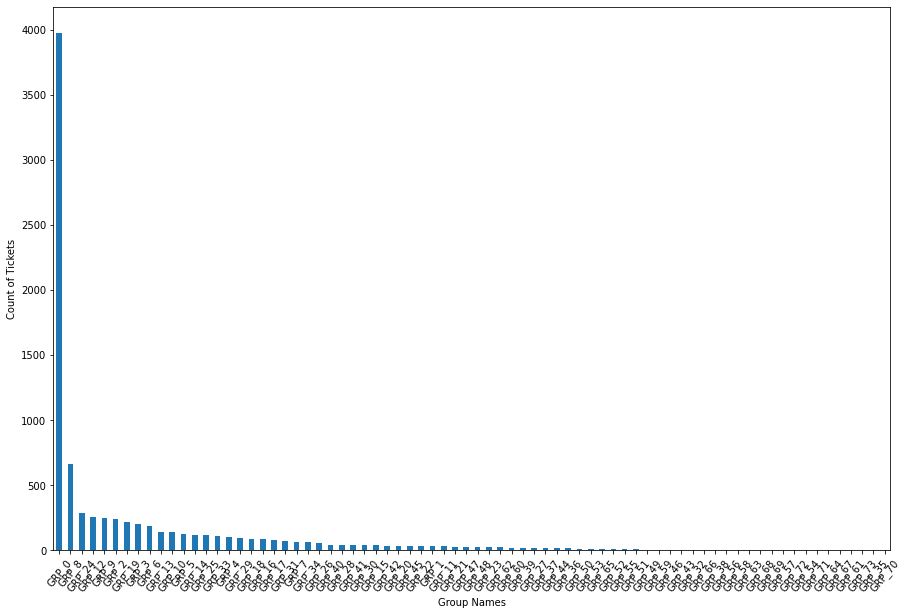

In [26]:
plt.figure(figsize=(15,10))
group_df.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Group Names")
plt.ylabel("Count of Tickets")
plt.show()

In [28]:
df_small_clean['Description Clean No Stop Words'][0]

'verified user details employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved'

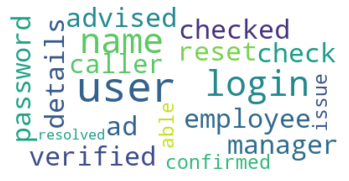

In [30]:
# Start with one review:
text = df_small_clean['Description Clean No Stop Words'][0]
# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

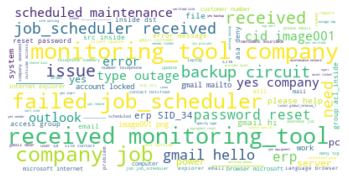

In [34]:
text = " ".join(review for review in df['Description'])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
text = " ".join(review for review in df_small_clean['Description Clean No Stop Words'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1111616 words in the combination of all review.


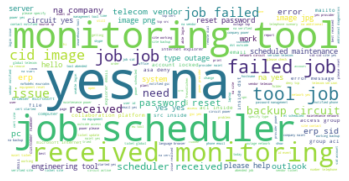

In [32]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

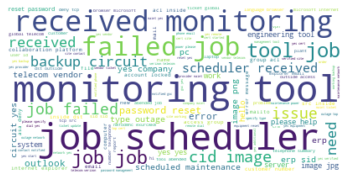

In [33]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["na"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()